In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
inc=pd.read_csv("income.csv")
inc

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


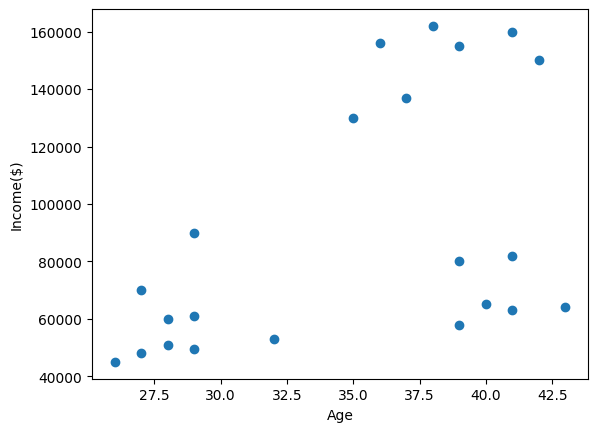

In [5]:
plt.scatter(inc['Age'], inc['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km=KMeans(n_clusters=3, init='random')
y_pred=km.fit_predict(inc[['Age', 'Income($)']])
y_pred

array([1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [8]:
inc['Cluster']=y_pred
inc

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,2


In [9]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05]])

In [10]:
inc1=inc[inc.Cluster==0]
inc2=inc[inc.Cluster==1]
inc3=inc[inc.Cluster==2]
inc1

,Name,Age,Income($),Cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


Text(0, 0.5, 'Income($)')

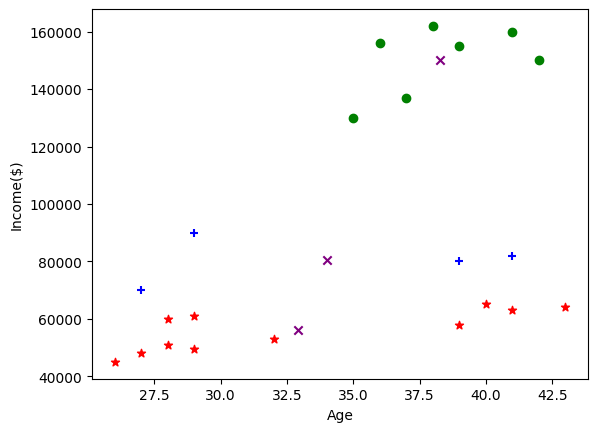

In [11]:
plt.scatter(inc1['Age'], inc1['Income($)'], marker='*', c='red')
plt.scatter(inc2['Age'], inc2['Income($)'], marker='+', c='blue')
plt.scatter(inc3['Age'], inc3['Income($)'], marker='o', c='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x', c='purple')
plt.xlabel("Age")
plt.ylabel("Income($)")


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale=MinMaxScaler()
scale.fit(inc[['Age']])
inc['Age']=scale.transform(inc[['Age']])
scale.fit(inc[['Income($)']])
inc['Income($)']=scale.transform(inc[['Income($)']])

In [15]:
inc

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [16]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(inc[['Age', 'Income($)']])
    sse.append(km.inertia_)

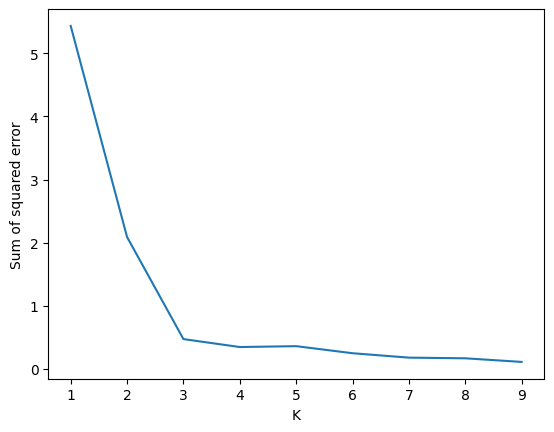

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

In [18]:
#using iris dataset


In [19]:
from sklearn.datasets import load_iris
iris=load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
irisdt=pd.DataFrame(iris['data'], columns=iris['feature_names'])
irisdt

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
irisdata=irisdt.drop(['sepal length (cm)', 'sepal width (cm)'],  axis=1)
irisdata

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'petal_width')

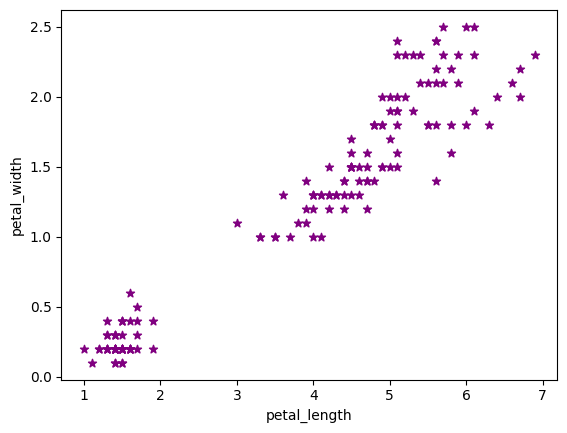

In [22]:
plt.scatter(irisdata['petal length (cm)'], irisdata['petal width (cm)'], marker='*', color='purple')
plt.xlabel('petal_length')
plt.ylabel('petal_width')


In [24]:
scale=MinMaxScaler()

scale.fit(irisdata[['petal length (cm)']])
irisdata['petal length (cm)']=scale.transform(irisdata[['petal length (cm)']])

scale.fit(irisdata[['petal width (cm)']])
irisdata['petal width (cm)']=scale.transform(irisdata[['petal width (cm)']])

irisdata

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [36]:
km_iris=KMeans(n_clusters=3, init='random')
y_pred=km_iris.fit_predict(irisdata[['petal length (cm)', 'petal width (cm)']])
y_pred
km_iris.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.55867014, 0.51041667],
       [0.07830508, 0.06083333]])

In [37]:
ssei=[]
k_rngi=range(1,10)
for k in k_rngi:
    kmi=KMeans(n_clusters=k, init='random')
    kmi.fit(irisdata[['petal length (cm)', 'petal width (cm)']])
    ssei.append(kmi.inertia_)

In [38]:
ssei

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8538617353912241,
 0.6800800986587507,
 0.6007846803096585,
 0.4967129879634012,
 0.42782881781712107]

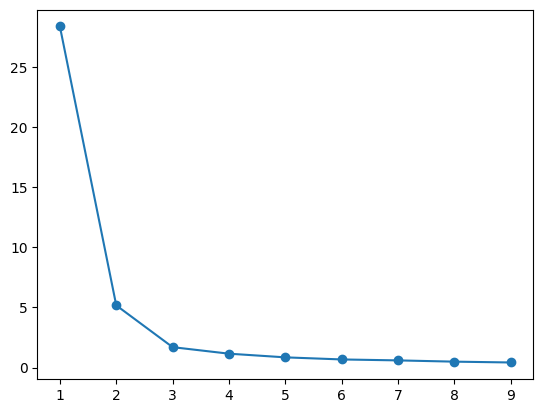

In [39]:
plt.plot(k_rngi, ssei, marker='o')

In [40]:
km_iris.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.55867014, 0.51041667],
       [0.07830508, 0.06083333]])

In [41]:
irisdata['cluster']=y_pred
irisdata

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [42]:
iris1=irisdata[irisdata.cluster==0]
iris2=irisdata[irisdata.cluster==1]
iris3=irisdata[irisdata.cluster==2]
iris3

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
5,0.118644,0.125000,2
6,0.067797,0.083333,2
7,0.084746,0.041667,2
8,0.067797,0.041667,2
9,0.084746,0.000000,2


Text(0.5, 0, 'p_width')

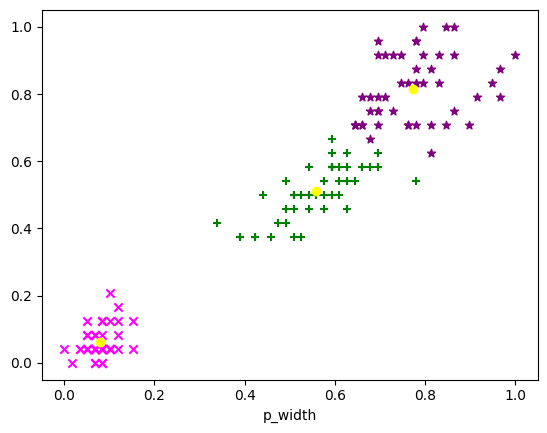

In [43]:
plt.scatter(iris1['petal length (cm)'], iris1['petal width (cm)'], marker='*', color='purple')
plt.scatter(iris2['petal length (cm)'], iris2['petal width (cm)'], marker='+', color='green')
plt.scatter(iris3['petal length (cm)'], iris3['petal width (cm)'], marker='x', color='magenta')

plt.scatter(km_iris.cluster_centers_[:, 0], km_iris.cluster_centers_[:,1], marker='o', c='yellow')
plt.xlabel("p_length")
plt.xlabel("p_width")